## Analysis 1
1. What are the top three body parts most frequently represented in this dataset?
2. What are the top three body parts that are least frequently represented?


In [1]:
#Importing required packages
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
%matplotlib inline
import datetime

In [2]:
#Reading the required files
df1=pd.read_csv(r"NEISS Data/NEISS2014.csv")
df2=pd.read_csv(r"NEISS Data/BodyParts.csv")

In [4]:
#Performing a left join to combine the body part code of df1 with the body part name in df2
df3=pd.merge(df1,df2, how="left", left_on="body_part",right_on="Code")

In [5]:
#Filtering data which has the value 'Not Recorded' since that is data which does not have recorded data
df3=df3[(df3['BodyPart']!='Not Recorded')]

In [6]:
#Calculating frequency of occurence of each body part
df4=df3.groupby("BodyPart")['BodyPart'].agg({'Frequency':'count'}).reset_index()

In [7]:
#Sorting the values based on frequency
df5=df4.sort_values(['Frequency'],ascending=False).reset_index(drop=True)

In [8]:
#Selecting top three body parts based on frequency
df6=df5.head(3)
print("Top three body parts most frequently represented in this dataset")
print(df6)

Top three body parts most frequently represented in this dataset
  BodyPart  Frequency
0     Head       9891
1     Face       5786
2   Finger       5783


In [9]:
#Selecting bottom three body parts based on frequency
df7=df5.tail(3)
print("Top three body parts least frequently represented in this dataset")
print(df7)

Top three body parts least frequently represented in this dataset
          BodyPart  Frequency
22        Internal        549
23    Pubic region        286
24  25-50% of body          4


In [10]:
#Selecting top three and botton three in a single statement
df7 = df5.iloc[np.r_[0:3, -3:0]]
print(df7)

          BodyPart  Frequency
0             Head       9891
1             Face       5786
2           Finger       5783
22        Internal        549
23    Pubic region        286
24  25-50% of body          4


In [11]:
# Visualizing frequency of occurence of body parts represented in this dataset/


In [12]:
gf1=df5.head(10)

In [13]:
gf2=df5.tail(10)

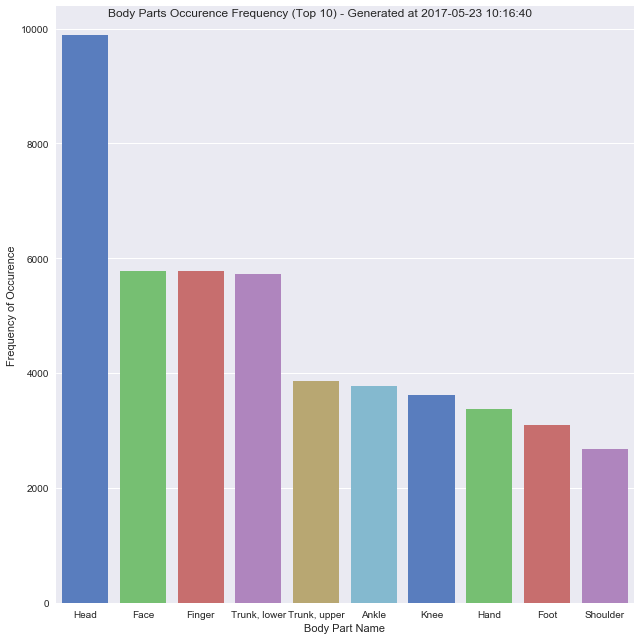

In [14]:
ax=sns.factorplot("BodyPart", "Frequency",
                               data=gf1, kind="bar",
                               size=9, palette="muted", legend=False)
ax.set(xlabel='Body Part Name', ylabel='Frequency of Occurence')
ax.fig.suptitle('Body Parts Occurence Frequency (Top 10) - Generated at '+str(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')))

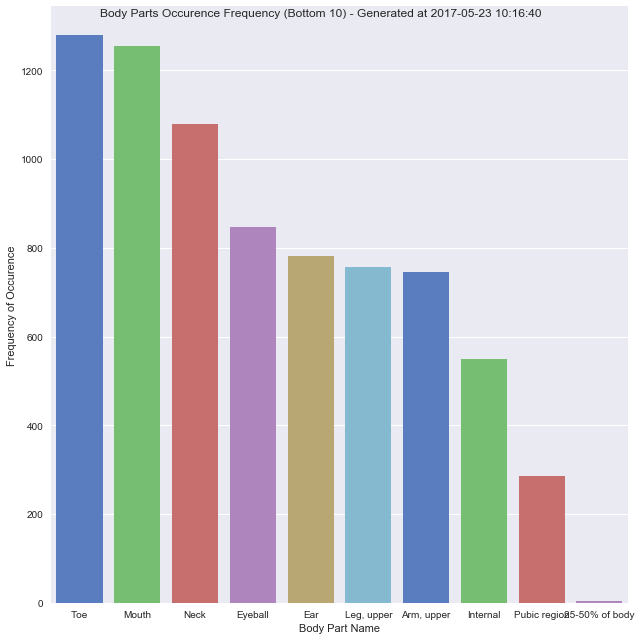

In [15]:
ax2=sns.factorplot("BodyPart", "Frequency",
                               data=gf2, kind="bar",
                               size=9, palette="muted", legend=False)
ax2.set(xlabel='Body Part Name', ylabel='Frequency of Occurence')
ax2.fig.suptitle('Body Parts Occurence Frequency (Bottom 10) - Generated at '+str(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')))